# **Excercise Sheet 3:** Feature Selection and Regularization

# Part A: Foundations & Concepts

Before diving into coding and implementing feature selection and regularization techniques, it's important to understand the fundamental concepts and motivations behind these methods.

Take a moment to reflect on these concepts yourself before seeking additional help from ChatGPT 😉 You're also encouraged to discuss these ideas with your classmates.

## 1. General Concepts

### a) Why do we need to do feature seelction or regularization when wanting to do a linear regression model with a high number of features?

#### Your Answer:

#### Solution:
- Overfitting: the model may fit the training data too closely, capturing noise rather than the underlying pattern. Bad generalization to new data.
- Computational Cost: More features lead to increased computational complexity, making the model slower to train and evaluate.
- Interpretability: A model with too many features can be difficult to interpret.
- Numerical issues with model fitting, not able to estimate the coefficients properly.

### b) What does feature selection mean and how does it differ from regularization?

#### Your Answer:

#### Solution:
- Feature selection: Drop some features from the model, based on some criteria (e.g. correlation with target variable, statistical tests, etc.). The model is trained only on the selected features.
- Regularization: All features are still included in the model, but their impact is reduced.

### c) Can we be confident that we select the correct variables in feature selection?

#### Your Answer:

#### Solution:
- It depends, in general it's difficult.
- One issue could be that with a lot of predictors, some of them might just relate to the target by chance, and we might select them wrongly.
- Another issue is that with highly correlated predictors, we might select one of them, but not the other, even if both are important for the outcome. In this case Ridge regularization is better suited as it won't select one over the other, but rather reduce the impact of both.

# Part B: Coding & Visualization

Now let's apply our knowledge of feature selection and regularization! We start with some imports needed.

*Hint:* The functions imported from the Helper file, may help you in certain tasks, but you are not required to use them. You can also write your own code to achieve the same results. 

## Notes:
- Note: We need to use OLS for the summary table and haven't used it up to now (in handsons). Maybe we need to give a hint
- I think we should use the same dataset for all tasks, because this way we can compare the results.

In [63]:
# Standard Libraries
import numpy as np
import pandas as pd
import warnings

# Visualization
import seaborn as sns

# Scikit-learn: Data Processing
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scikit-learn: Models and Metrics
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# Statistical Models
from statsmodels.api import OLS, add_constant

# Helper Functions
from helper import (
    plot_pca_cumvar,
    cross_validate_regularization,
    plot_regularization_path,
    regularization_coef_progression,
    print_regression_table,
)

# Configuration
warnings.filterwarnings("ignore")

## 2. Linear Regression with high-dimensional data

TODO: Text about dataset once fixed

### a) Load and inspec the dataset `riboflavin.csv`
- What types of predictors and outcomes are present in the dataset?
- Plot pairplots of the first 5 variables 
*Hint:* use sns.pairplot

In [64]:
# Student Code

In [65]:
# Load data
riboflavin = pd.read_csv('riboflavin.csv')

In [66]:
# Inspect Data
print(riboflavin.shape)
riboflavin.iloc[:, :5].head()

(71, 4089)


,y,x.AADK_at,x.AAPA_at,x.ABFA_at,x.ABH_at
0,11.719617,8.492404,8.111451,8.320842,10.287112
1,8.662450,7.639380,7.239965,7.289051,9.862287
2,10.784044,8.088340,7.855510,7.793395,9.676720
3,10.889748,7.886820,7.939513,7.997588,9.680562
4,9.777993,6.805762,7.554522,7.609902,8.551953


In [67]:
# Check the features and outcomes
print("Features:")
print(riboflavin.columns.tolist()[:5])

Features:
['y', 'x.AADK_at', 'x.AAPA_at', 'x.ABFA_at', 'x.ABH_at']


In [68]:
# Check for categorical features and their values
print("Data types:")
print(riboflavin.iloc[:,:5].dtypes)

Data types:
y            float64
x.AADK_at    float64
x.AAPA_at    float64
x.ABFA_at    float64
x.ABH_at     float64
dtype: object


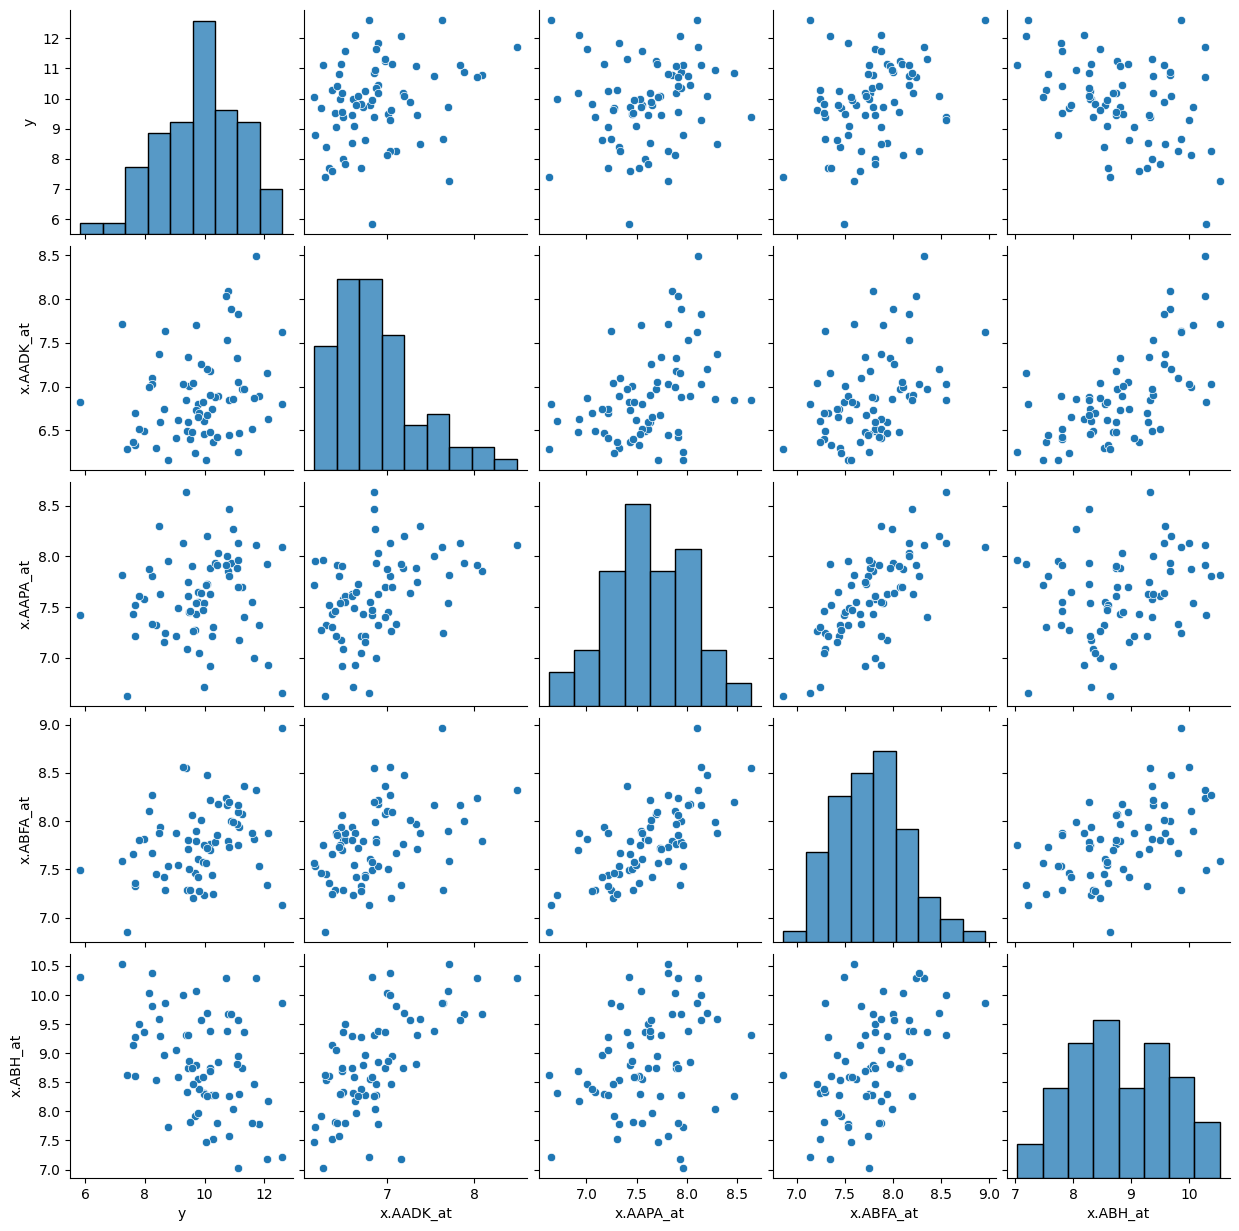

In [69]:
# pairplot of the first 5 variables
sns.pairplot(riboflavin.iloc[:, :5])

In [70]:
X = riboflavin.drop(columns=['y'])
y = riboflavin['y']

### b) Split the dataset into training and test set (70%/30% split)

In [71]:
# Student Code

In [72]:
# Split the Dataset into training and test set (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### c) Perform a linear regression using first using all features.

In [73]:
# Student Code

In [74]:
# Perform linear regression using all features
# Fit the model
model_full = LinearRegression()
model_full.fit(X_train, y_train);

print_regression_table(X_train, y_train)

R²: 1.0000, Adj R²: nan, F: nan
Features: 4088, Observations: 49

First 20 coefficients:
              Coef.  P>|t|
const      0.000107    NaN
x.AADK_at  0.032662    NaN
x.AAPA_at  0.006267    NaN
x.ABFA_at  0.014310    NaN
x.ABH_at  -0.057534    NaN
x.ABNA_at  0.011918    NaN
x.ABRB_at -0.014270    NaN
x.ACCA_at  0.010284    NaN
x.ACCB_at -0.005051    NaN
x.ACCC_at  0.012228    NaN
x.ACDA_at  0.012019    NaN
x.ACKA_at -0.013381    NaN
x.ACOA_at  0.001842    NaN
x.ACOB_at  0.009317    NaN
x.ACOC_at  0.003220    NaN
x.ACOL_at  0.000335    NaN
x.ACOR_at -0.002157    NaN
x.ACPA_at -0.006110    NaN
x.ACSA_at -0.002020    NaN
x.ACUA_at  0.002385    NaN


All coefficients are very small and p-values are NaN, because the model is not able to estimate the coefficients properly (due to p >> n).

### d) Now perform a linear regression using only the first 10 features.
- Compare the regression tables.

In [75]:
# Student Code

In [76]:
# Perform a linear regresion using the first 10 features

num_features = 10

X_train_reduced = X_train.iloc[:, :num_features]
X_test_reduced = X_test.iloc[:, :num_features]

model_reduced = LinearRegression()
model_reduced.fit(X_train_reduced, y_train);

print_regression_table(X_train_reduced, y_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
No. Observations:                  49   F-statistic:                     779.5
Covariance Type:            nonrobust   Prob (F-statistic):           9.35e-41
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0847      0.590     -1.838      0.074      -2.280       0.110
x.AADK_at      2.6311      0.065     40.654      0.000       2.500       2.762
x.AAPA_at     -1.6559      0.110    -15.026      0.000      -1.879      -1.433
x.ABFA_at      3.2790      0.096     34.086      0.000       3.084       3.474
x.ABH_at      -2.1929      0.038    -57.016      0.000      -2.271      -2.115
x.ABNA_at     -0.0399      0.049     -0.819      0.4

### e) Calculate MSE and R2 for both models on the training data. What can you conclude?

In [77]:
# Student Code

In [78]:
# Compute MSE and R2 for both models

# Predictions for the full model
y_pred_full = model_full.predict(X_train)
mse_full = mean_squared_error(y_train, y_pred_full)
r2_full = r2_score(y_train, y_pred_full)

print(f"Full Model Training MSE:{mse_full:.4f}")
print(f"Full Model Training R2:{r2_full:.4f}")


Full Model Training MSE:0.0000
Full Model Training R2:1.0000


In [79]:
# Predictions for the reduced model
y_pred_reduced = model_reduced.predict(X_train_reduced)
mse_reduced = mean_squared_error(y_train, y_pred_reduced)
r2_reduced = r2_score(y_train, y_pred_reduced)

print(f"Reduced Model Training MSE:{mse_reduced:.4f}")
print(f"Reduced Model Training R2:{r2_reduced:.4f}")

Reduced Model Training MSE:0.0098
Reduced Model Training R2:0.9951


We see that the full model nearly finds a perfect fit on the training data, while the reduced model has a much lower R2 and higher MSE. This is could lead to the conclusion that the full model is outperforming the reduced model.

### f) Now predict and calculate MSE and R2 for both models on the test data. 
- Is there a difference? 
- What can you conclude?


In [80]:
# Predictions on test data full model
y_test_pred_full = model_full.predict(X_test)
mse_test_full = mean_squared_error(y_test, y_test_pred_full)
r2_test_full = r2_score(y_test, y_test_pred_full)

print(f"Full Model Test MSE:{mse_test_full:.4f}")
print(f"Full Model Test R2:{r2_test_full:.4f}")

Full Model Test MSE:0.6710
Full Model Test R2:0.5456


In [81]:
# Predictions on test data reduced model
y_test_pred_reduced = model_reduced.predict(X_test_reduced)
mse_test_reduced = mean_squared_error(y_test, y_test_pred_reduced)
r2_test_reduced = r2_score(y_test, y_test_pred_reduced)

print(f"Reduced Model Test MSE:{mse_test_reduced:.4f}")
print(f"Reduced Model Test R2:{r2_test_reduced:.4f}")

Reduced Model Test MSE:0.0161
Reduced Model Test R2:0.9891


## 3. PCA Regression

### a) Load the dataset `leukemia.csv`
- What types of predictors and outcomes are present in the dataset?
- Plot pairplots of the first 5 variables

In [82]:
# Load dataset
leukemia = pd.read_csv('leukemia.csv')

In [83]:
# Inspect Data
print(leukemia.shape)
leukemia.iloc[:, :5].head()

(94, 3572)


,x.1,x.2,x.3,x.4,x.5
0,0.561549,0.213566,-0.636584,0.347124,0.545509
1,-0.623141,-0.912107,-0.465296,-0.734345,-0.539898
2,-0.814524,-1.084069,-0.583127,1.785912,1.445064
3,0.229492,-0.965719,-0.525060,-0.188016,-0.534603
4,-0.706016,0.660884,-0.548306,-0.702840,-0.285707


In [84]:
# Check the features and outcomes
print("Features:")
print(leukemia.columns.tolist()[:5])

Features:
['x.1', 'x.2', 'x.3', 'x.4', 'x.5']


In [85]:
# Check for categorical features and their values
print("Data types:")
print(leukemia.iloc[:,:5].dtypes)

Data types:
x.1    float64
x.2    float64
x.3    float64
x.4    float64
x.5    float64
dtype: object


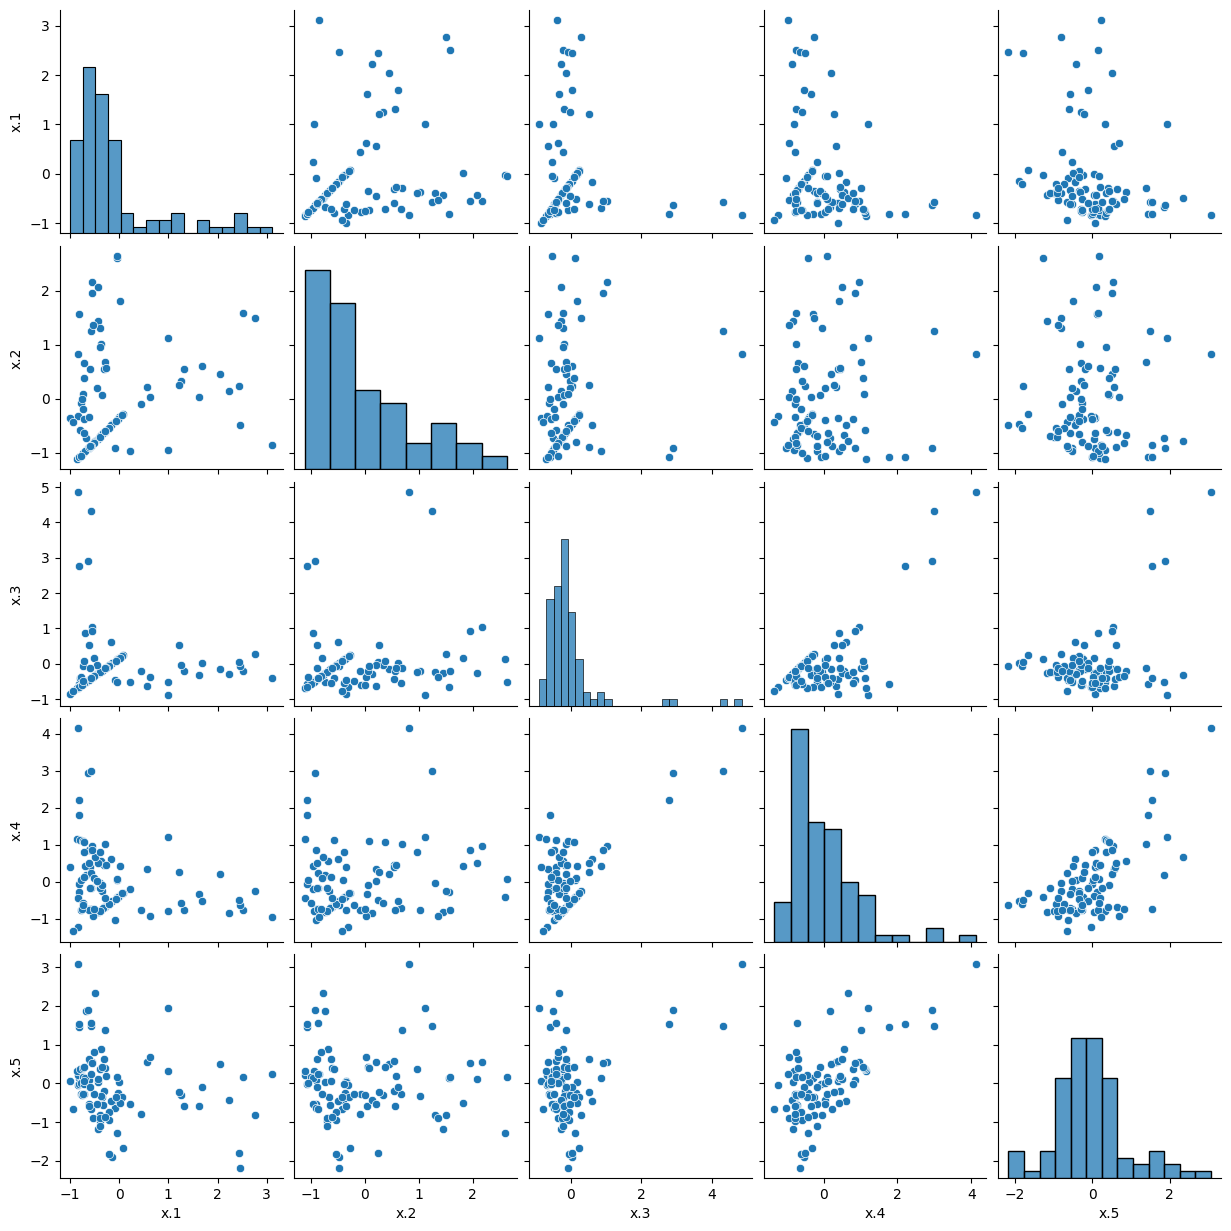

In [86]:
# pairplot of the first 5 variables
sns.pairplot(leukemia.iloc[:, :5])

In [87]:
X = leukemia.drop(columns=['y'])
y = leukemia['y']

print(y.value_counts())

y
0    47
1    47
Name: count, dtype: int64


In [88]:
# # Split the Dataset into training and test set (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)   

### b) Fit a linear regression model using all features.
- Print the regression table.

In [89]:
# Student Code

In [90]:
# Perform Linear Regression using all features
model_full = LinearRegression()
model_full.fit(X_train, y_train);
print_regression_table(X_train, y_train)

R²: 1.0000, Adj R²: 1.0000, F: 15191802630330956444115927040.00
Features: 3571, Observations: 65

First 20 coefficients:
          Coef.          P>|t|
const  0.033785  2.331606e-157
x.1   -0.002061  2.828631e-152
x.2   -0.004953  5.216358e-154
x.3    0.000101  1.001211e-136
x.4    0.001316  1.197657e-148
x.5    0.001436  1.883379e-150
x.6    0.000161  8.416147e-140
x.7   -0.000060  1.405111e-133
x.8    0.000040  2.556963e-131
x.9   -0.003109  8.885116e-154
x.10  -0.003327  1.947151e-154
x.11  -0.002510  1.721103e-153
x.12  -0.002712  1.859363e-153
x.13  -0.000926  5.451081e-146
x.14   0.001325  1.284401e-148
x.15   0.001475  7.824596e-150
x.16   0.000091  2.088191e-137
x.17  -0.001203  3.269498e-149
x.18   0.001773  1.089928e-149
x.19  -0.000775  4.451246e-146


In [91]:
# Predict test mse

y_test_pred_full = model_full.predict(X_test)
mse_test_full = mean_squared_error(y_test, y_test_pred_full)
r2_test_full = r2_score(y_test, y_test_pred_full)

print(f"Full Model Test MSE:{mse_test_full:.4f}")
print(f"Full Model Test R2:{r2_test_full:.4f}")

Full Model Test MSE:0.0216
Full Model Test R2:0.9108


### b) Perform PCA on the dataset. 
- Is it important to scale the data before PCA? 

*Hint:* Check if the units of the data differs

In [92]:
# Student Code

In [93]:
# Optional Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
# Perform PCA on the dataset, compute 30 principal components
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In this case I'd say it's not necessary to scale the data, since all features are genetic data and have the same unit (gene expression).

### d) Plot the cumulative explained variance. How many are needed to explain 80% of the variance?

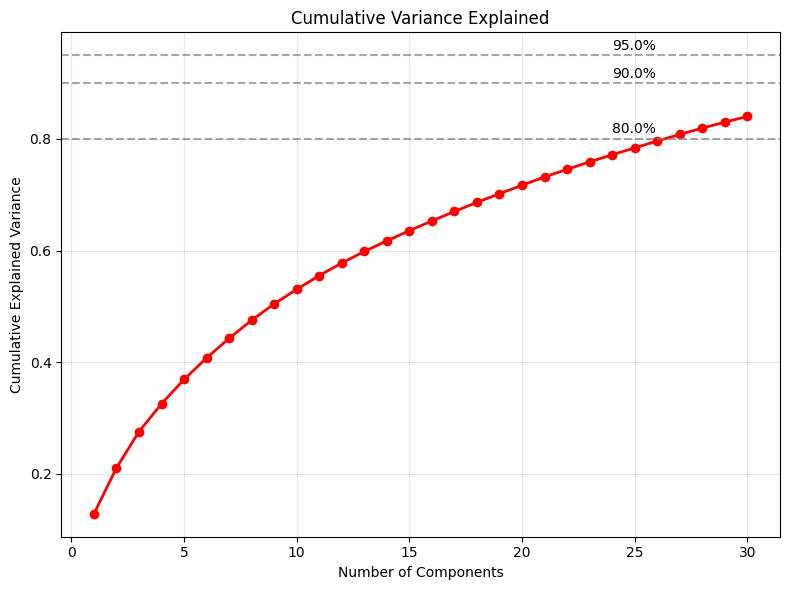

In [95]:
plot_pca_cumvar(pca)

Around 11 components are needed to explain 80% of the variance.

### e) Now let's compute the linear regression on the principal components
- Use enough principal components to explain 80% of the variance.

*Hint:* if you did not solve the previous exercise, continue with 10 principal components (or all).

In [96]:
# Student Code

In [97]:
# Fit linear regression on PCA components
num_pc = 27

X_train_pca_reduced = X_train_pca[:, :num_pc]
X_test_pca_reduced = X_test_pca[:, :num_pc]

model_pca = LinearRegression()
model_pca.fit(X_train_pca_reduced, y_train);

### f) Print the regression table. Are the coefficients interpretable?

In [98]:
print_regression_table(X_train_pca_reduced, y_train)

R²: 0.9636, Adj R²: 0.9370, F: 36.26
Features: 27, Observations: 65

First 20 coefficients:
          Coef.         P>|t|
const  0.538462  1.044601e-29
x1    -0.016447  3.446976e-23
x2     0.010328  1.434926e-13
x3     0.014410  2.015436e-16
x4     0.002975  1.555794e-02
x5    -0.000823  5.155333e-01
x6     0.008565  1.671537e-07
x7     0.001270  3.684765e-01
x8     0.002016  1.745238e-01
x9    -0.006246  2.213447e-04
x10    0.004848  4.947007e-03
x11    0.003022  7.771152e-02
x12    0.002940  1.003385e-01
x13   -0.001653  3.697730e-01
x14    0.000819  6.693147e-01
x15    0.002972  1.318763e-01
x16    0.005424  9.709610e-03
x17   -0.004696  2.436422e-02
x18    0.007312  1.055544e-03
x19    0.002088  3.268550e-01


Coefficients are interpretable but meaningful interpretation is challenging. We have to look at the loadings of the different PCs. If the first two PCs show different loadings of clinically meaningful features, then the coefficients can be meaningful interpreted. Otherwise rather challenging. 

But we reduce computational power and importantly overfitting with PCA regression compared to regression with all predictors.

### g) Calculate MSE and R2 for the PCA regression on the test data. 
- Compare it to the full model mse.
- What can you conclude?


In [99]:
# Student Code

In [100]:
# Calculate MSE and R2 for PCA model
y_pred_pca = model_pca.predict(X_test_pca_reduced)
mse_test_pca = mean_squared_error(y_test, y_pred_pca)
r2_test_pca = r2_score(y_test, y_pred_pca)

print(f"Full Model Test MSE:{mse_test_full:.4f}")
print(f"Full Model Test R2:{r2_test_full:.4f}")

print(f"PCA Model Test MSE:{mse_test_pca:.4f}")
print(f"PCA Model Test R2:{r2_test_pca:.4f}")

Full Model Test MSE:0.0216
Full Model Test R2:0.9108
PCA Model Test MSE:0.0351
PCA Model Test R2:0.8554


TODO: Interpretation once fixed dataset

## 4. Ridge and Lasso Regression

We reuse the same dataset as before, but now we want to apply regularization techniques.

In [101]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def simulate_medical_dataset(n_patients=500, n_features=15, noise_level=0.1, random_state=42):
    """
    Simulate a medical dataset predicting patient recovery time after surgery
    """
    np.random.seed(random_state)
    
    # Generate patient demographics and measurements
    age = np.random.normal(55, 15, n_patients)  # Age: mean=55, std=15
    age = np.clip(age, 18, 90)  # Realistic age range
    
    bmi = np.random.normal(26, 4, n_patients)  # BMI: slightly overweight population
    bmi = np.clip(bmi, 18, 45)
    
    blood_pressure = np.random.normal(130, 20, n_patients)  # Systolic BP
    blood_pressure = np.clip(blood_pressure, 90, 200)
    
    # Lab values
    cholesterol = np.random.normal(200, 40, n_patients)
    cholesterol = np.clip(cholesterol, 120, 350)
    
    hemoglobin = np.random.normal(13.5, 2, n_patients)
    hemoglobin = np.clip(hemoglobin, 8, 18)
    
    # Create correlated features (multicollinearity for Ridge/Lasso demo)
    glucose = 80 + 0.4 * age + 0.9 * bmi + np.random.normal(0, 12, n_patients)
    glucose = np.clip(glucose, 70, 300)
    
    # More lab values with some correlation
    creatinine = 0.8 + 0.01 * age + 0.01 * blood_pressure + np.random.normal(0, 0.3, n_patients)
    creatinine = np.clip(creatinine, 0.5, 3.0)
    
    # Surgery-specific factors
    surgery_duration = np.random.normal(120, 35, n_patients)  # minutes
    surgery_duration = np.clip(surgery_duration, 60, 240)
    
    complication_score = np.random.poisson(1, n_patients)  # 0-5 complications
    complication_score = np.clip(complication_score, 0, 5)
    
    # Add some irrelevant/noise features
    noise_features = np.random.normal(0, 1.5, (n_patients, n_features - 9))
    
    # Combine all features
    X = np.column_stack([
        age, bmi, blood_pressure, cholesterol, hemoglobin, 
        glucose, creatinine, surgery_duration, complication_score,
        noise_features
    ])
    
    # Create realistic recovery time (target variable)
    # True relationship: some features matter, others don't
    true_recovery = (
        0.1 * age +                    # Age matters
        0.2 * bmi +                    # BMI matters  
        0.05 * blood_pressure +        # BP matters slightly
        0.01 * cholesterol +            # Cholesterol doesn't matter
        -0.3 * hemoglobin +            # Higher hemoglobin = faster recovery
        0.02 * glucose +               # Glucose matters slightly
        0.2 * creatinine +             # Kidney function important
        0.02 * surgery_duration +      # Longer surgery = longer recovery
        0.4 * complication_score +     # Complications matter a lot
        np.sum(0 * noise_features, axis=1)  # Noise features don't matter
    )
    
    # Add noise and ensure positive recovery times
    y = true_recovery + np.random.normal(0, noise_level * np.std(true_recovery), n_patients)
    y = np.maximum(y, 1)  # Minimum 1 day recovery
    
    # Create feature names
    feature_names = [
        'age', 'bmi', 'blood_pressure', 'cholesterol', 'hemoglobin',
        'glucose', 'creatinine', 'surgery_duration', 'complication_score'
    ] + [f'biomarker_{i}' for i in range(1, n_features - 8)]
    
    # Create DataFrame
    df = pd.DataFrame(X, columns=feature_names)
    df['recovery_days'] = y
    
    return df


**Dataset Overview:**
- **50 patients** undergoing surgical procedures
- **Target variable**: Post-surgical recovery time in days
- **50 features** total:
  - 9 clinically variables (age, BMI, blood pressure, cholesterol, hemoglobin, glucose, creatinine, surgery duration, complication score)
  - 39 biomarkers features

**Clinical Goals:**
1. **Prediction**: Accurately estimate recovery time to optimize discharge planning and resource allocation
2. **Feature selection**: Identify which patient factors and biomarkers truly influence recovery outcomes

This dataset is ideal for comparing **Ridge regression** (handling correlated features) with **Lasso regression** (automatic feature selection to eliminate irrelevant features) in a realistic healthcare context where both prediction accuracy and clinical interpretability are essential for patient care decisions.

Medical Dataset Summary:
Shape: (70, 50)
Target variable (recovery_days) range: 15.5 to 25.3

First few rows:
         age        bmi  blood_pressure  cholesterol  hemoglobin     glucose  \
0  62.450712  27.445582      134.549199   222.835620   13.727035  133.412200   
1  52.926035  32.152146      156.142855   245.422626   14.824261  147.811620   
2  64.715328  25.856696       97.850335   238.160071   16.672034  139.449073   
3  77.845448  32.258575      133.692677   226.055650   11.024369  138.251634   
4  51.487699  18.000000      135.197656   187.389230   17.766067  116.566885   

   creatinine  surgery_duration  complication_score  biomarker_1  ...  \
0    3.000000        119.720958                 1.0     1.249836  ...   
1    3.000000        171.798045                 0.0     3.232859  ...   
2    2.350967        122.707891                 1.0    -0.528259  ...   
3    3.000000         89.855053                 1.0     0.618856  ...   
4    2.860466        173.309343             

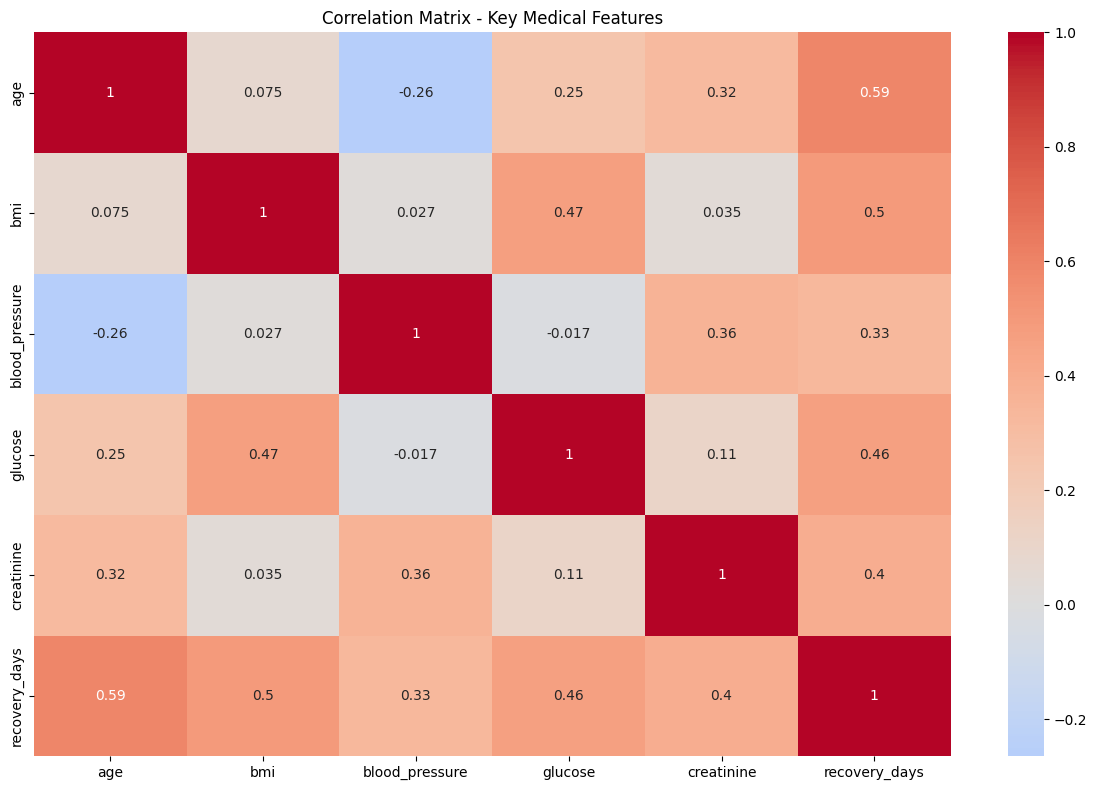

In [102]:

# Generate the dataset
medical_data = simulate_medical_dataset(n_patients=70, n_features=49, noise_level=0.15)

print("Medical Dataset Summary:")
print(f"Shape: {medical_data.shape}")
print(f"Target variable (recovery_days) range: {medical_data['recovery_days'].min():.1f} to {medical_data['recovery_days'].max():.1f}")
print("\nFirst few rows:")
print(medical_data.head())

# Show correlation matrix for main features
import seaborn as sns
plt.figure(figsize=(12, 8))
main_features = ['age', 'bmi', 'blood_pressure', 'glucose', 'creatinine', 'recovery_days']
sns.heatmap(medical_data[main_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix - Key Medical Features')
plt.tight_layout()
plt.show()


In [103]:
X = medical_data.drop(columns=['recovery_days'])
y = medical_data['recovery_days']

In [104]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### a) Fit a full model on the training data
- Report Test MSE and R2

In [105]:
# Student Code

In [106]:
# Solution
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Test MSE and R2
y_test_pred = lin_reg.predict(X_test)
mse_lin_reg = mean_squared_error(y_test, y_test_pred)
r2_lin_reg = r2_score(y_test, y_test_pred)

print(f"Test MSE: {mse_lin_reg:.4f}")
print(f"Test R2: {r2_lin_reg:.4f}")

Test MSE: 0.9967
Test R2: 0.7614


### b) Fit Ridge regression with different alphas using training data.
- What is the optimal alpha?

*Hint:* Use the `RidgeCV` function from `sklearn.linear_model` to find the optimal alpha.

In [107]:
# Student Code

In [108]:
alphas = np.logspace(-3, 2, 100)

# Using RidgeCV
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv = ridge_cv.fit(X_train, y_train)
optimal_alpha = ridge_cv.alpha_
print("Optimal alpha:", optimal_alpha)

Optimal alpha: 0.9545484566618337


Alphas length: 100
CV scores length: 100
CV stds length: 100


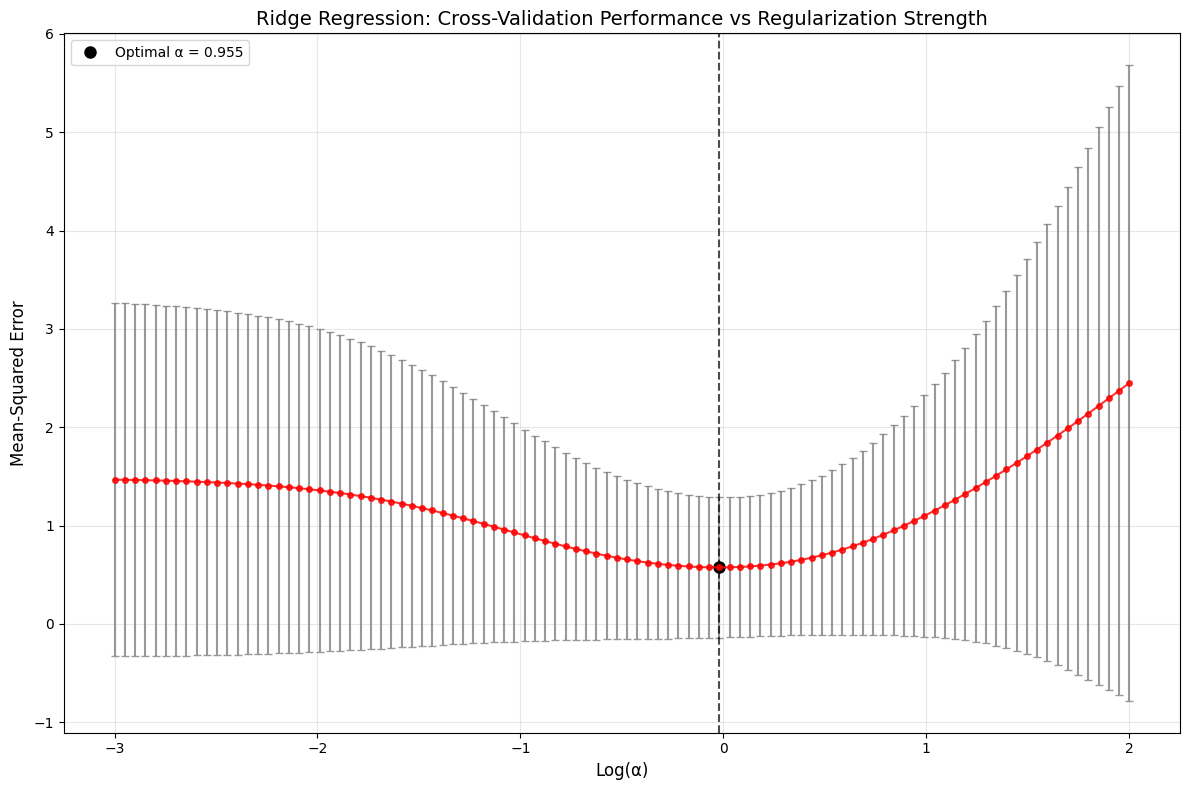

np.float64(0.9545484566618337)

In [109]:
plot_regularization_path(ridge_cv, model_name="Ridge")

### c) Show coefficient shrinkage for different alphas. 
- What do you observe? 
- Do you expect coefficients to be zero for some alphas?

*Hint:* use `regularization_coef_progression` from the helper file

In [110]:
# Student Code

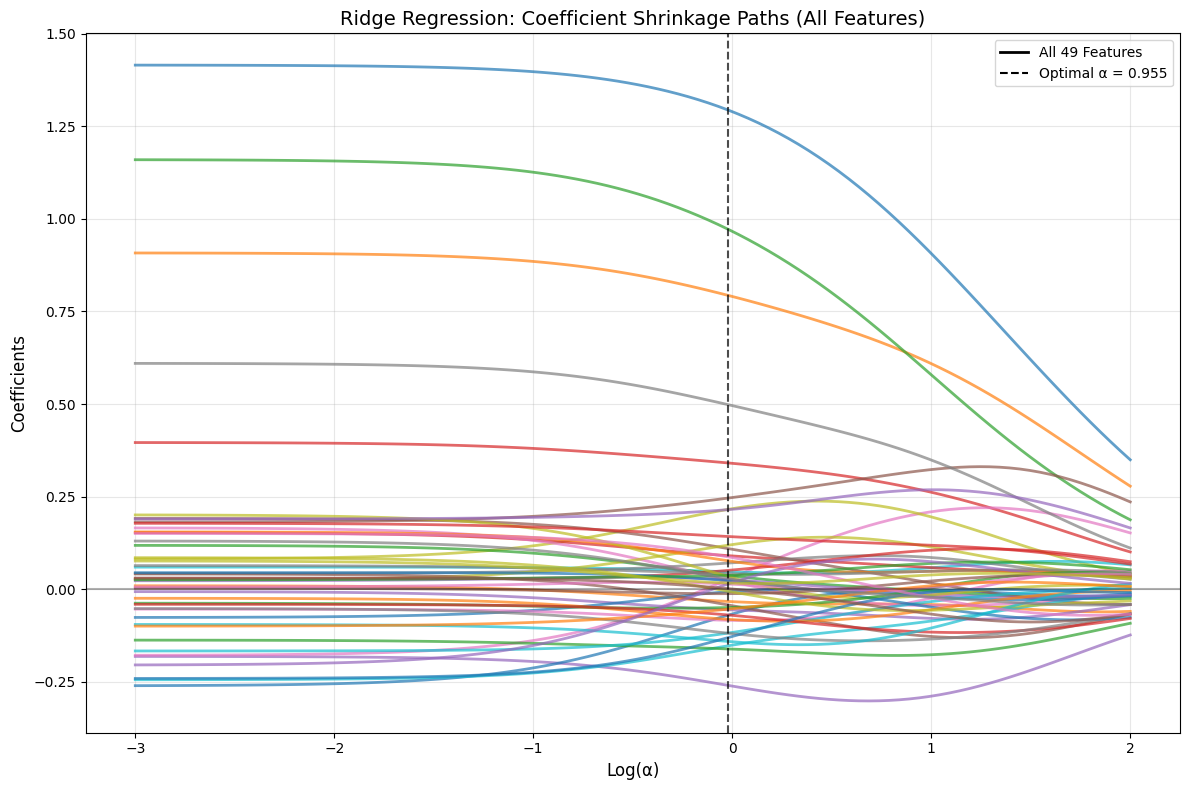

In [111]:
# Coef progression
regularization_coef_progression(
    X_train, y_train, alphas=alphas, model_name='Ridge', optimal_alpha=optimal_alpha)

We can see that with ridge regression, coefficients are shrunk towards zero, but not to zero.

### d) Fit Lasso regression with different alphas using training data

In [112]:
# Student Code

In [113]:
alphas = np.logspace(-3, 0, 100)

# Using LassoCV
lasso_cv = LassoCV(alphas=alphas)
lasso_cv.fit(X_train, y_train)
optimal_alpha = lasso_cv.alpha_
print("Optimal alpha:", optimal_alpha)

Optimal alpha: 0.026560877829466867


Alphas length: 100
CV scores length: 100
CV stds length: 100


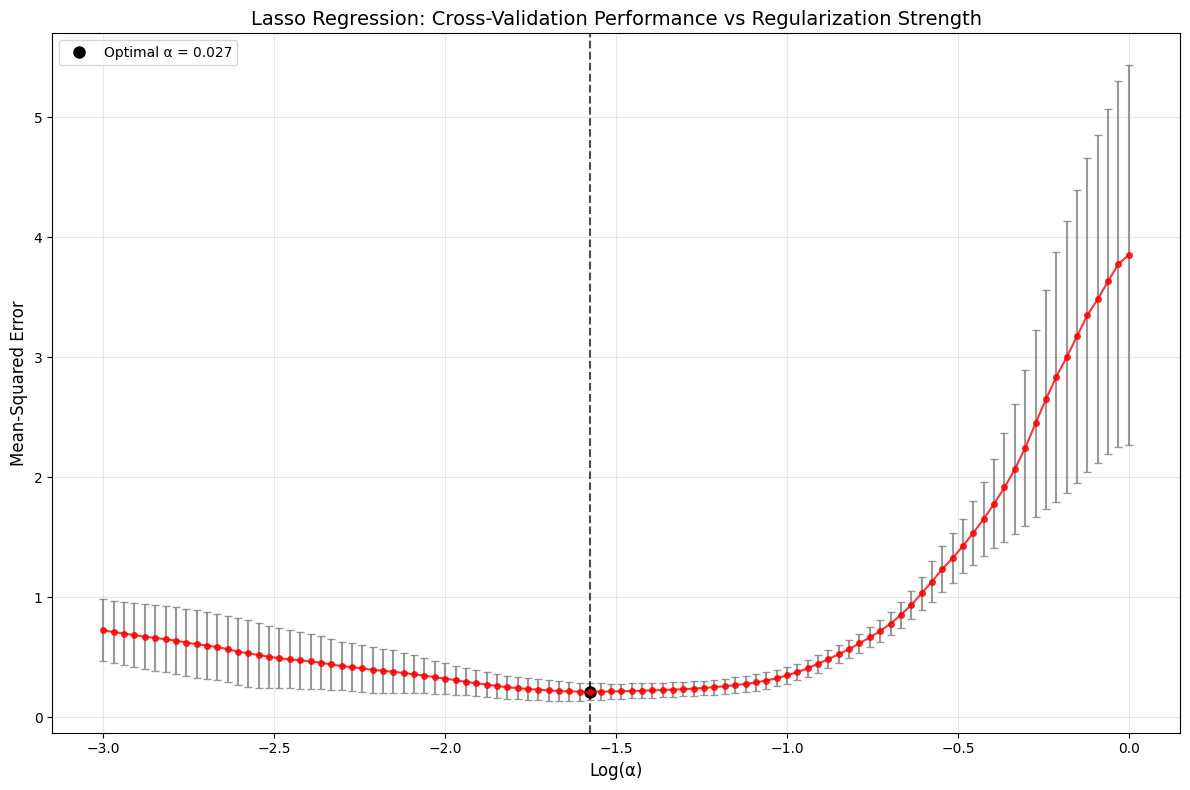

In [114]:
# Now use the fixed function
optimal_alpha = plot_regularization_path(lasso_cv, model_name="Lasso")

### e) Show the coefficients for each alpha. 
- How do they change with increasing alpha? 
- Are features dropped?

*Hint:* use `regularization_coef_progression` from the helper file

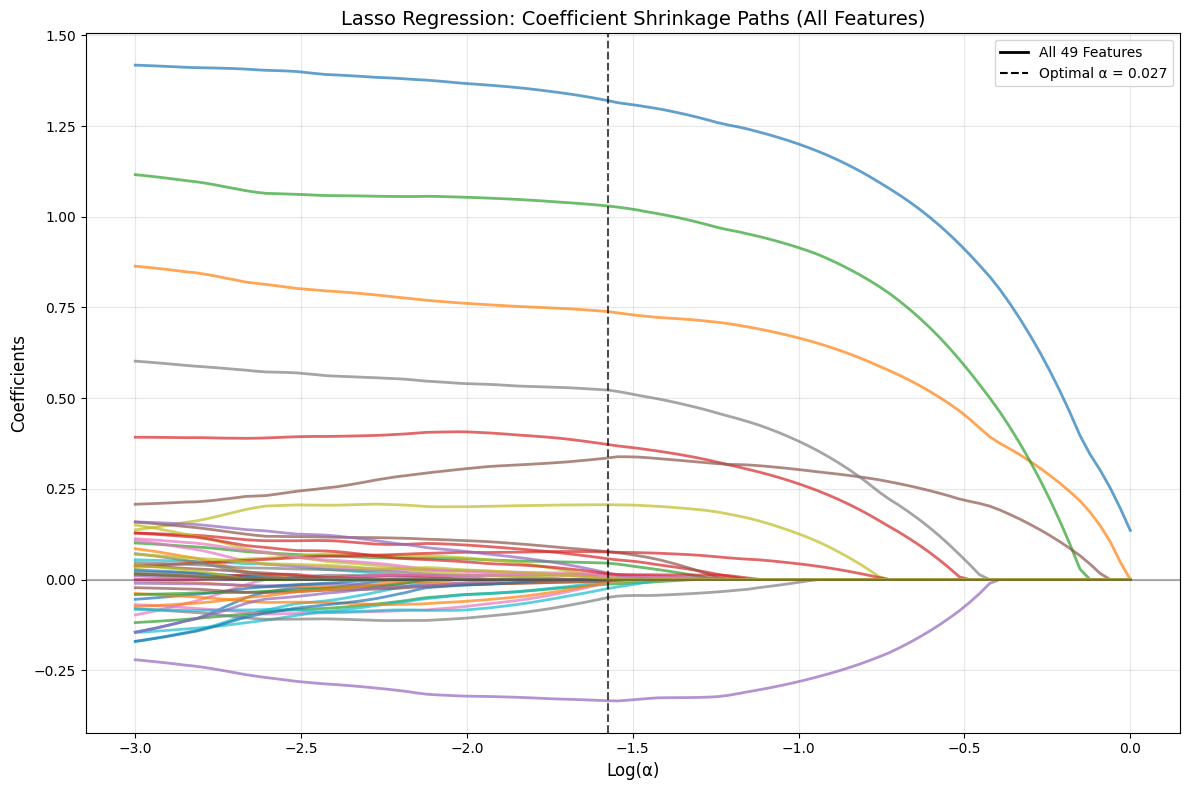

In [115]:
regularization_coef_progression(
    X_train, y_train, alphas=alphas, model_name='Lasso', optimal_alpha=optimal_alpha)

### f) Compare all Models using MSE and R2 on the test data. 
- Which model performs best?
- Linear Regression on all features, Ridge and Lasso Regression

In [116]:
# Student Code

In [117]:
# Fit Ridge Regression on features
y_ridge_pred = ridge_cv.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_ridge_pred)
r2_ridge = r2_score(y_test, y_ridge_pred)

In [118]:
# Fit Lasso Regression on features
y_lasso_pred = lasso_cv.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_lasso_pred)
r2_lasso = r2_score(y_test, y_lasso_pred)

In [119]:
# Create a DataFrame to compare all models' performance metrics

model_comparison = pd.DataFrame({
    'Model': ['Full Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'Test MSE': [mse_lin_reg, mse_ridge, mse_lasso],
    'Test R2': [r2_lin_reg, r2_ridge, r2_lasso]
})

# Sort by Test MSE to see best performers
model_comparison = model_comparison.sort_values('Test MSE')

# Format the values for better readability
model_comparison['Test MSE'] = model_comparison['Test MSE'].map('{:.4f}'.format)
model_comparison['Test R2'] = model_comparison['Test R2'].map('{:.4f}'.format)

model_comparison

,Model,Test MSE,Test R2
2,Lasso Regression,0.2077,0.9503
1,Ridge Regression,0.4529,0.8916
0,Full Linear Regression,0.9967,0.7614


TODO: Interpretation once fixed.

## 5. Cross-Validation

### a) What is the difference between train-test split and cross-validation?

#### Your Answer:


#### Solution:
In cross validation all data is used once as train or test. Usually used when not having a lot of data. Train-test split is used when you have a lot of data and you can afford to keep some data only for test set. 

### b) Perform a cross-validation(5-folds) with the lasso model from last exercise. 
- Report the MSE for all folds. 
- Are they different to the MSE of the test set form the previous exercise?

*Hint:* Use `cross_val_score(..., scoring='neg_mean_squared_error')` from `sklearn.model_selection`

In [120]:
# Student Code

In [121]:
# Cross Validation with 5-folds for Lasso, import cross_val_score
scores = cross_val_score(lasso_cv, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE scores: {[-float(round(score, 4)) for score in scores]}")
print(f"Average Cross-validated MSE: {-scores.mean():.4f}")

Cross-validated MSE scores: [0.1401, 0.1124, 0.3469, 0.1737, 0.1522]
Average Cross-validated MSE: 0.1851


Yes we see quit a difference depending on the fold!

### c) Finally we introduce a new concept which is common in clincal data science. "Leave-One-Out Cross-Validation" (LOOCV). 
- In this method, we leave one sample out for testing and use the rest for training. - - - This is repeated for each sample in the dataset. 
- Implement this and compare the results to the 5-fold cross-validation. 
- What do you observe?

*Hint:* Use `LeaveOneOut` and `cross_val_score` from sklearn

In [122]:
# Student Solution

In [123]:
loo = LeaveOneOut()
loo_scores = cross_val_score(lasso_cv, X, y, cv=loo, scoring='neg_mean_squared_error')
print(f"Average Leave-One-Out Cross-validated MSE: {-loo_scores.mean():.4f}")

Average Leave-One-Out Cross-validated MSE: 0.1601


In [ ]:
# Display Leave-One-Out MSE scores in a readable table format
loo_scores_df = pd.DataFrame(-loo_scores, columns=['MSE'])
loo_scores_df.head(10)  # Show just first 10 rows for readability

Average Leave-One-Out Cross-validated MSE: 0.1601


,MSE
0,0.007417
1,0.325772
2,0.010248
3,0.000013
4,0.079891
5,0.327603
6,0.082193
7,0.159634
8,0.003535
9,0.040463


Observations:
- Increased loading time
- Averaged MSE higher lower (update once dataset is fixed)